# Import libraries

In [1]:
from __future__ import division, print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi

from IPython.display import clear_output

from library import * # All library modules
import data_manager as dm
%matplotlib inline

# Directories

In [2]:
dir_main = os.getcwd() # Main directory
dir_opts = os.path.join(dir_main, 'options') # Contains all plot options

# Data set directories for import/export
dataset_name = 'dataset_fig3'
data_name = '1'

if data_name != None:
    dir_data = os.path.join(dir_main, 'data', dataset_name, data_name)

else:
    dir_data = os.path.join(dir_main, 'data', dataset_name)

# Generate single solution plots

The following plots use **single solution** data sets generated from `comp_script`. Set `dataset_name` to be the name of your single solution data folder, or `dir_data` to be the name of your single solution data directory.

## Import data

In [4]:
km = dm.Data()
km.dir_save = dir_data
km.import_data()

# Figure size
full_size = (8.27, 11.69)

# Plot options
po = plot_pack.plot_options

## Centralized phases

Plots a random sample of the centralized phases from the numerical solution

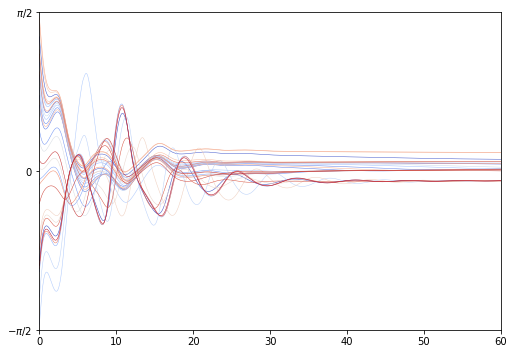

In [5]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Settings
km.num_inds = 30 # Sample size of plotted phases

# Process arrays
km.compute_mean_arrays()
km.compute_center_phase_arrays()

# Set up arrays
x_array = km.sol.t
y_array = km.centered_phases

# Set up plot
plot_pack.centered_phases_template(ax)
ax.set_xlim(left=0, right=x_array[-1])

# Colourmap
colormap = plt.cm.get_cmap('coolwarm')
colorlist = [colormap(i) for i in np.linspace(0, 0.99, y_array.shape[1])]
ax.set_prop_cycle(color=colorlist)
        
# Plot arrays
ax.plot(x_array, y_array, **po('line', 'small'))

# Injury?
if km.is_inj:
    ax.axvline(x=km.inj_time, **po('line', 'dash', color='black'))

## Density of phase differences

Plots a histogram of phase differences, scaled so that it corresponds to the Gaussian density function centered at mean 0 and variance equaling the sample variance of the phase differences.

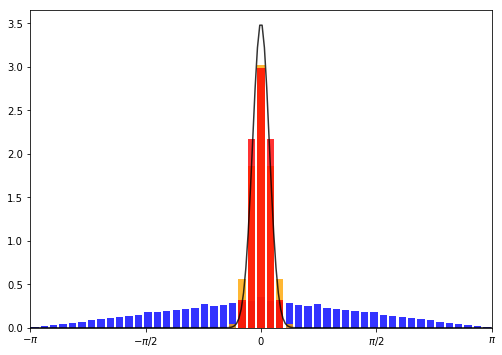

In [9]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Array settings
km.diff_steps = 50 # Number of steps in phase difference plot
km.gauss_steps = 200 # Number of steps in Gaussian function plot

# Plot settings
bar_width = 0.1

col_0 = 'blue'
col_m = 'orange'
col_f = 'red'
col_line = 'green'

alpha_bar = 0.8
alpha_line = 0.8

# Process arrays
km.compute_phase_diff_arrays()

x_array = km.phase_diff_x
y0_array = km.phase_diff_0
ym_array = km.phase_diff_m
yf_array = km.phase_diff_f

gauss_x_array = km.phase_gauss_x
gauss_y_array = km.phase_gauss_y

# Set up plot
plot_pack.phase_diffs_template(ax)

# Plot arrays
ax.bar(x_array, y0_array, width=bar_width, color=col_0, alpha=alpha_bar)
ax.bar(x_array, ym_array, width=bar_width, color=col_m, alpha=alpha_bar)
ax.bar(x_array, yf_array, width=bar_width, color=col_f, alpha=alpha_bar)

ax.plot(gauss_x_array, gauss_y_array, alpha=alpha_line, **po('line', 'default', color='black'))

## Delays

Plots a random sample of the delay solutions over time.

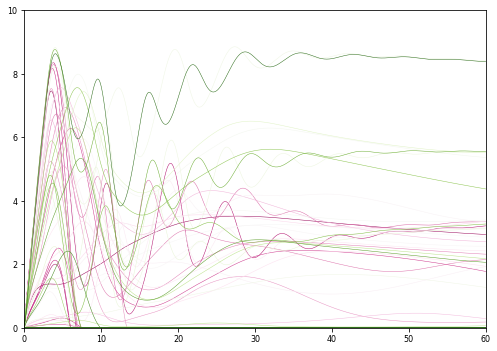

In [13]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Set up arrays
x_array = km.sol.t
y_array = km.delay_data.samY

# Set up plot
plot_pack.basic_template(ax, tick='medium')
ax.set_ylim(bottom=0, top=km.Tau_upper)
ax.set_xlim(left=0, right=x_array[-1])

# Colourmap
colormap = plt.cm.get_cmap('PiYG')
colorlist = [colormap(i) for i in np.linspace(0, 0.99, y_array.shape[1])]
ax.set_prop_cycle(color=colorlist)
        
# Plot arrays
ax.plot(x_array, y_array, **po('line', 'small'))

# Injury?
if km.is_inj:
    ax.axvline(x=km.inj_time, **po('line', 'dash', color='black'))

## Log density of delays

Plots a histogram of logged delays at the initial, injury, and final time. 

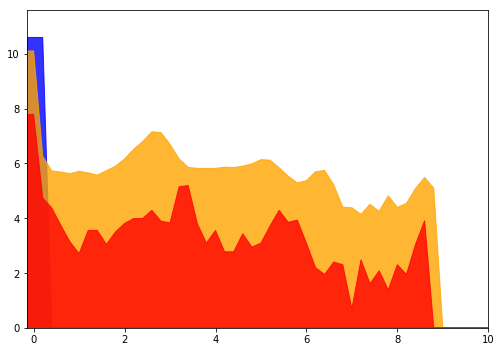

In [14]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Plot options
alpha = 0.8
color_0 = 'blue'
color_m = 'orange'
color_f = 'red'

# Process arrays
km.compute_delay_dists()

# Set up arrays
x_array = km.Tau_space
Tau0_array = km.Tau0_count
Taum_array = km.Taum_count
Tauf_array = km.Tauf_count

# Adjust Tau0:
Tau0_array[0] = Tau0_array[-1]
        
# Plot function
plt_fun = lambda Y: np.log(1 + Y)

# Plot arrays
plt0_array = plt_fun(Tau0_array)
pltm_array = plt_fun(Taum_array)
pltf_array = plt_fun(Tauf_array)

# Maximum
all_max = max(np.max(plt0_array), np.max(pltm_array), np.max(pltf_array))

# Plot settings
plot_pack.basic_template(ax, tick='medium')
ax.set_xlim(left=x_array[-1], right=x_array[-3])
ax.set_ylim(bottom=0, top=all_max + 1)

# Plot arrays
ax.fill(x_array, plt0_array, color=color_0, alpha=alpha)
ax.fill(x_array, pltm_array, color=color_m, alpha=alpha)
ax.fill(x_array, pltf_array, color=color_f, alpha=alpha)    